Found classes: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', '__pycache__']
Blight: 1146 images
Common_Rust: 1306 images
Gray_Leaf_Spot: 574 images
Healthy: 1162 images
__pycache__: 0 images


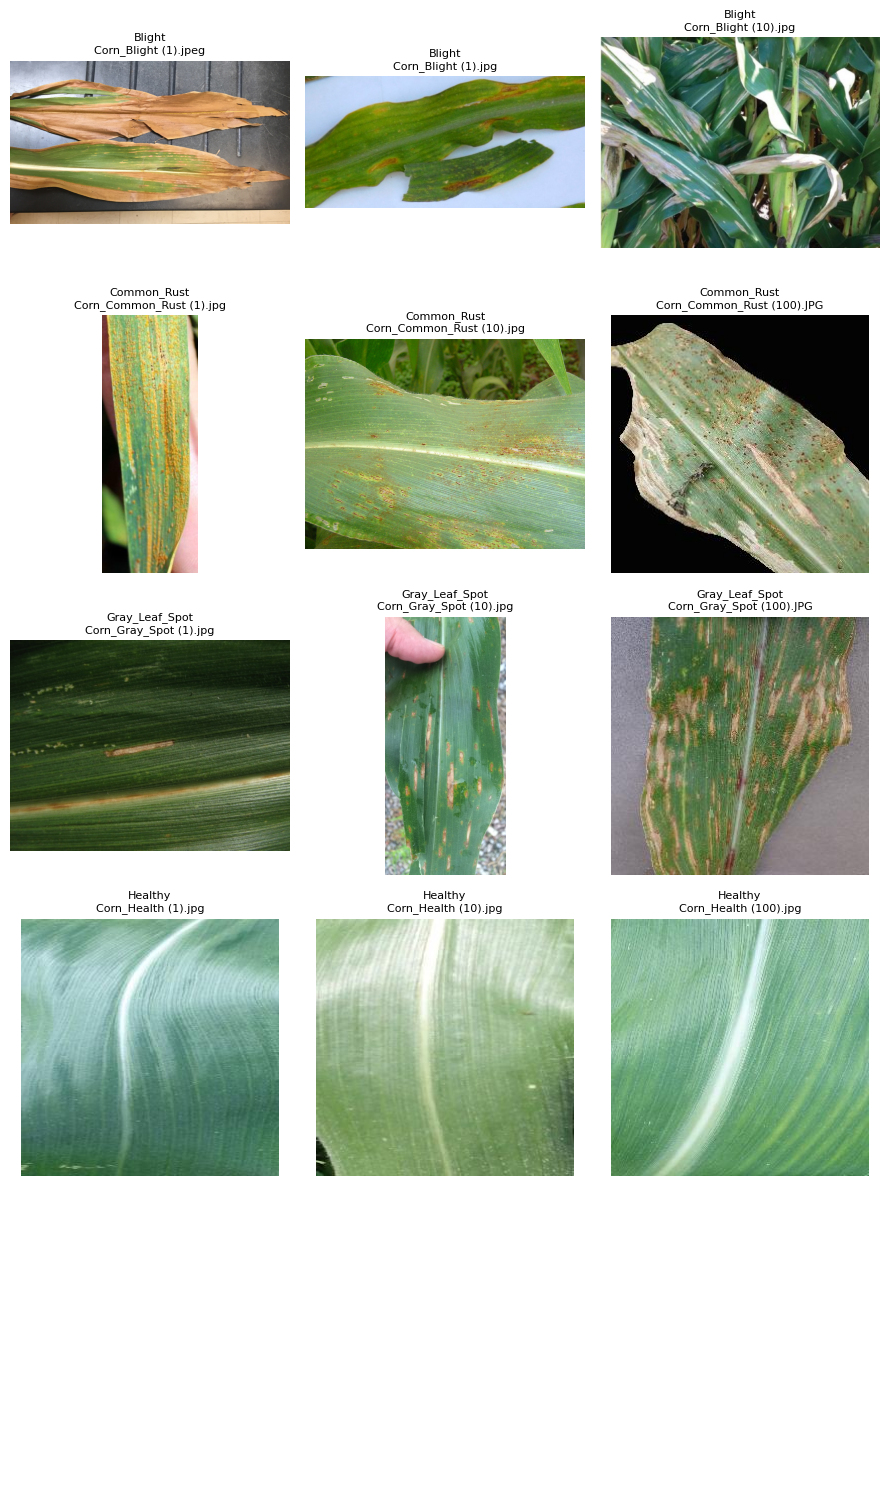

In [1]:
# ...existing code...
import os
from PIL import Image
import matplotlib.pyplot as plt

base_dir = r'C:\Users\H514 #4856\Desktop\deep_learning_114206103\HW2\data'
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
print("Found classes:", classes)

# 統計每個 class 檔案數
exts = ('.jpg', '.jpeg', '.png', '.bmp')
counts = {}
for c in classes:
    files = [f for f in os.listdir(os.path.join(base_dir, c)) if f.lower().endswith(exts)]
    counts[c] = files
    print(f"{c}: {len(files)} images")

# 顯示每個 class 最多 3 張範例圖
n_show = 3
n_classes = len(classes)
plt_cols = n_show
plt_rows = n_classes
fig, axes = plt.subplots(plt_rows, plt_cols, figsize=(3*plt_cols, 3*plt_rows))
if plt_rows == 1:
    axes = [axes]  # 保持索引一致

for i, c in enumerate(classes):
    files = counts[c]
    for j in range(plt_cols):
        ax = axes[i][j] if plt_rows > 1 else axes[j]
        ax.axis('off')
        if j < len(files):
            p = os.path.join(base_dir, c, files[j])
            try:
                img = Image.open(p).convert('RGB')
                ax.imshow(img)
                ax.set_title(f"{c}\n{files[j]}", fontsize=8)
            except Exception as e:
                ax.set_title(f"Error\n{os.path.basename(p)}", fontsize=8)
        else:
            ax.set_title('')
plt.tight_layout()
plt.show()
# ...existing code...

In [2]:
#輸出照片的大小的資訊，不要重複輸出相同的大小
all_sizes = []
for c in classes:
    files = counts[c]
    print(f"Class: {c}")
    for f in files:
        p = os.path.join(base_dir, c, f)
        try:
            img = Image.open(p)
            if img.size not in all_sizes:
                all_sizes.append(img.size)
                #print(f"  {f}: {img.size}")
        except Exception as e:
            print(f"  {f}: Error loading image")
print(f"Unique sizes: {all_sizes}")

Class: Blight
Class: Common_Rust
Class: Gray_Leaf_Spot
Class: Healthy
Class: __pycache__
Unique sizes: [(1000, 585), (788, 371), (641, 482), (300, 200), (256, 256), (1080, 421), (1489, 3264), (300, 339), (400, 267), (450, 612), (400, 334), (340, 255), (618, 463), (1158, 1200), (362, 240), (1500, 1125), (250, 200), (675, 414), (606, 404), (2592, 1936), (1200, 1600), (2448, 2448), (363, 237), (3264, 2448), (519, 279), (1819, 2731), (884, 3071), (400, 300), (662, 335), (594, 374), (995, 611), (497, 309), (565, 711), (960, 1280), (432, 290), (2592, 1944), (600, 400), (563, 554), (1024, 512), (500, 734), (896, 407), (332, 250), (473, 306), (640, 640), (400, 302), (1920, 1080), (1200, 1494), (1024, 400), (1024, 768), (2048, 1536), (439, 308), (723, 451), (2448, 3264), (290, 358), (360, 640), (524, 393), (1936, 1296), (500, 195), (521, 833), (504, 335), (384, 287), (281, 330), (180, 347), (505, 283), (220, 293), (432, 350), (432, 313), (400, 261), (1170, 501), (1200, 900), (1600, 1200), (640,

# 查看模型結構

以下是幾種查看模型的方法：
1. 直接印出模型
2. 使用 torchsummary 查看詳細資訊
3. 查看模型參數數量
4. 視覺化模型架構

In [3]:
# 方法1: 直接印出模型結構
import torch
import sys
sys.path.append(r'C:\Users\H514 #4856\Desktop\deep_learning_114206103\HW2')
from Model import SimpleCNN
from torchsummary import summary
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=4, input_size=256).to(DEVICE)
summary(model, input_size=(3, 256, 256))  # 輸入大小為 3x256x256

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
       BatchNorm2d-2         [-1, 32, 256, 256]              64
              ReLU-3         [-1, 32, 256, 256]               0
         MaxPool2d-4         [-1, 32, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          18,496
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
         MaxPool2d-8           [-1, 64, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
AdaptiveAvgPool2d-12            [-1, 128, 1, 1]               0
          Flatten-13                  [-1, 128]               0
           Linear-14                  [

In [4]:
# 方法1: 直接印出模型結構
import torch
import sys
sys.path.append(r'C:\Users\H514 #4856\Desktop\deep_learning_114206103\HW2')
from Model import SimpleCNN2_deeper
from torchsummary import summary
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN2_deeper(num_classes=4, input_size=256).to(DEVICE)
summary(model, input_size=(3, 256, 256))  # 輸入大小為 3x256x256

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
       BatchNorm2d-2         [-1, 32, 256, 256]              64
              ReLU-3         [-1, 32, 256, 256]               0
         MaxPool2d-4         [-1, 32, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          18,496
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
         MaxPool2d-8           [-1, 64, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
        MaxPool2d-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]         295,168
      BatchNorm2d-14          [-1, 256,